In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read imputed data filev - x.csv
dfx = pd.read_csv('../csv_files/p3xmean.csv', index_col=0)
dfx.head()

,C1,C4,C7,C3p,C5p,C6p,T4p,T3p,T5p,S1p,S2p,S3p,C2
0,122.0,0.029074,51.345,0,3.864345,11.111111,0.640426,0.908876,0.054250,0.004875,0.009199,0.010929,1.0
1,259.0,-0.013352,25.936,1,12.028832,0.000000,0.644753,0.898724,0.051395,0.003258,0.011105,0.010876,0.0
2,90.0,0.020715,7.378,1,3.369134,0.000000,0.636816,0.909350,0.061764,0.011593,0.006271,0.011403,1.0
3,209.0,0.020023,8.526,1,3.299697,0.000000,0.539634,0.917060,0.061630,0.009686,0.007144,0.013319,1.0
4,80.0,-0.034895,632.298,0,3.726269,5.000000,0.587413,0.888469,0.048550,0.004518,0.010047,0.011261,1.0


In [3]:
# create separate dataframe for C2 and C3p as we do not need to change any outliers because it is a binary variable
# will concat this df with dfx dataframe later 
dfbinary = dfx.filter(['C2', 'C3p'])
dfbinary.head()

,C2,C3p
0,1.0,0
1,0.0,1
2,1.0,1
3,1.0,1
4,1.0,0


In [4]:
# drop C2 and C3p variable from working dfx dataframe
dfx = dfx.drop(labels=['C2', 'C3p'], axis=1)
dfx.head()

,C1,C4,C7,C5p,C6p,T4p,T3p,T5p,S1p,S2p,S3p
0,122.0,0.029074,51.345,3.864345,11.111111,0.640426,0.908876,0.054250,0.004875,0.009199,0.010929
1,259.0,-0.013352,25.936,12.028832,0.000000,0.644753,0.898724,0.051395,0.003258,0.011105,0.010876
2,90.0,0.020715,7.378,3.369134,0.000000,0.636816,0.909350,0.061764,0.011593,0.006271,0.011403
3,209.0,0.020023,8.526,3.299697,0.000000,0.539634,0.917060,0.061630,0.009686,0.007144,0.013319
4,80.0,-0.034895,632.298,3.726269,5.000000,0.587413,0.888469,0.048550,0.004518,0.010047,0.011261


In [5]:
# finding IQR for each column
Q1 = dfx.quantile(0.25)
Q3 = dfx.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

C1      67.750000
C4       0.044292
C7     458.948462
C5p      2.011641
C6p      7.142857
T4p      0.094898
T3p      0.026479
T5p      0.009118
S1p      0.002115
S2p      0.003524
S3p      0.003293
dtype: float64


In [6]:
# print out Q1 and Q3 values for each variable 
print('Q1 Values')
print(Q1)
print('Q3 Values')
print(Q3)

Q1 Values
C1     85.000000
C4     -0.013352
C7     41.511500
C5p     2.853439
C6p     0.000000
T4p     0.579954
T3p     0.883184
T5p     0.047234
S1p     0.004134
S2p     0.006979
S3p     0.009562
Name: 0.25, dtype: float64
Q3 Values
C1     152.750000
C4       0.030941
C7     500.459962
C5p      4.865080
C6p      7.142857
T4p      0.674852
T3p      0.909664
T5p      0.056351
S1p      0.006249
S2p      0.010503
S3p      0.012855
Name: 0.75, dtype: float64


In [7]:
# identifying outlier value locations sort of 
# Q1 - 1.5 * IQR = lower bound 
# Q3 + 1.5 * IQR = upper bound 

# define upper bound
upper = Q3 + 1.5 * IQR
# define lower bound 
lower = Q1 - 1.5 * IQR
# define outlier variable 
# below is equivalent to this formula: outlier = (dfx < (Q1 - 1.5 * IQR)) | (dfx > (Q3 + 1.5 * IQR))
outlier = (dfx < lower) | (dfx > upper)

# print out the results
# gives the location of the outlier values (indicated by True) based on the bounds defined above 
print(outlier)

        C1     C4     C7    C5p    C6p    T4p    T3p    T5p    S1p    S2p  \
0    False  False  False  False  False  False  False  False  False  False   
1     True  False  False   True  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False   True  False   
3    False  False  False  False  False  False  False  False   True  False   
4    False  False  False  False  False  False  False  False  False  False   
5    False  False  False  False  False  False   True  False  False  False   
6    False  False  False  False  False  False  False  False  False  False   
7    False  False  False  False  False   True  False   True  False  False   
8    False  False  False  False  False  False  False  False  False  False   
9    False  False  False  False  False  False  False  False  False  False   
10   False  False  False  False  False  False  False  False  False  False   
11   False  False  False  False  False  False  False  False  False  False   

In [8]:
# print the upper bound value for each variable
print(upper)

C1      254.375000
C4        0.097379
C7     1188.882656
C5p       7.882541
C6p      17.857143
T4p       0.817198
T3p       0.949383
T5p       0.070027
S1p       0.009423
S2p       0.015789
S3p       0.017794
dtype: float64


In [9]:
# print the lower bound for each variable 
print(lower)

C1     -16.625000
C4      -0.079790
C7    -646.911193
C5p     -0.164022
C6p    -10.714286
T4p      0.437608
T3p      0.843465
T5p      0.033557
S1p      0.000961
S2p      0.001693
S3p      0.004622
dtype: float64


In [10]:
# define upper and lower lists
upper = []
lower = []

# create for loop that will iterate over each value in every column
for i in dfx.columns:
    # define Q1 and Q3 for each column
    Q1 = dfx[i].quantile(0.25)
    Q3 = dfx[i].quantile(0.75)
    # define IQR for each column
    IQR = Q3 - Q1
    # append empty lists upper and lower
    upper_list = Q3 + 1.5 * IQR
    upper.append(upper_list)
    lower_list = Q1 - 1.5 * IQR
    lower.append(lower_list)
    

In [11]:
# define the function that will replace outlier values in each column with the appropriate upper or lower limit 
def outlier_handling(x, upper, lower):
    if x > upper:
        x = upper
    elif x < lower:
            x = lower
    else:
        pass
    return x

In [12]:
# apply the outlier handling function to the dfx dataframe to replace the outlier values in each column
for col in dfx.columns:
    q1 = dfx.loc[:, col].quantile(0.25)
    q3 = dfx.loc[:, col].quantile(0.75)
    IQR = q3 - q1
    lbound = q1 - 1.5*IQR
    ubound = q3 + 1.5*IQR
    dfx.loc[:, col] = dfx.loc[:, col].apply(lambda x: outlier_handling(x, ubound,lbound))

### Check that the Outlier Handling function Worked
### Examine the boxplots for each variable (should see no outliers) 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f832fcbdc18>,
 'caps': [<matplotlib.lines.Line2D at 0x7f832fc542e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f832fcbdac8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f832fc54978>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f832fc54cc0>],
 'means': []}

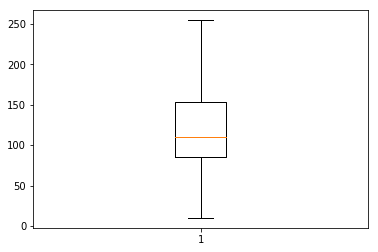

In [13]:
plt.boxplot(dfx['C1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f832fc407f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f832fc52be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f832fc52208>],
 'medians': [<matplotlib.lines.Line2D at 0x7f832fbdc2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f832fbdc5f8>],
 'means': []}

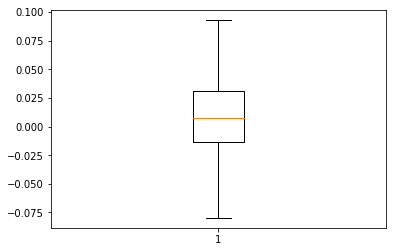

In [14]:
plt.boxplot(dfx['C4'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f832fbb57f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f832fbb5e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f832fbb56a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f832fbbc550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f832fbbc898>],
 'means': []}

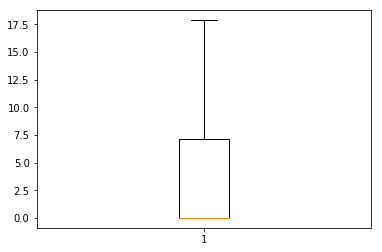

In [15]:
plt.boxplot(dfx['C6p'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f832fb16b38>,
 'caps': [<matplotlib.lines.Line2D at 0x7f832fb1b208>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f832fb169e8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f832fb1b898>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f832fb1bbe0>],
 'means': []}

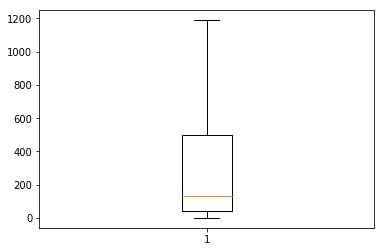

In [16]:
plt.boxplot(dfx['C7'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f832faf65c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f832faf6c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f832faf6470>],
 'medians': [<matplotlib.lines.Line2D at 0x7f832fafe320>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f832fafe668>],
 'means': []}

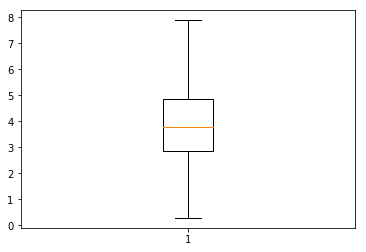

In [17]:
plt.boxplot(dfx['C5p'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f832fa55780>,
 'caps': [<matplotlib.lines.Line2D at 0x7f832fa55e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f832fa55630>],
 'medians': [<matplotlib.lines.Line2D at 0x7f832fa5b4e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f832fa5b828>],
 'means': []}

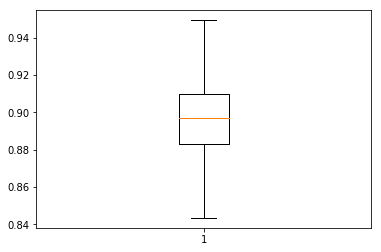

In [18]:
plt.boxplot(dfx['T3p'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8331cee8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8331ceef60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8331cee780>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8331ce8588>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8331ce8f28>],
 'means': []}

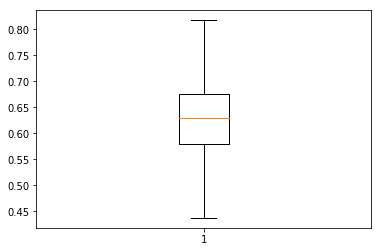

In [19]:
plt.boxplot(dfx['T4p'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f832fa03c88>,
 'caps': [<matplotlib.lines.Line2D at 0x7f832fa0c358>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f832fa03b38>],
 'medians': [<matplotlib.lines.Line2D at 0x7f832fa0c9e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f832fa0cd30>],
 'means': []}

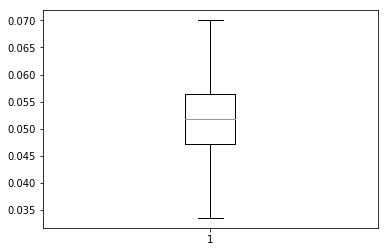

In [20]:
plt.boxplot(dfx['T5p'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f832f962ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f832f9695c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f832f962da0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f832f969c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f832f969f98>],
 'means': []}

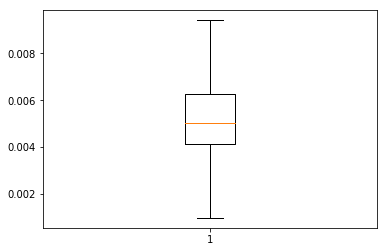

In [21]:
plt.boxplot(dfx['S1p'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f832f936e10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f832f9194e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f832f9369e8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f832f919b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f832f919eb8>],
 'means': []}

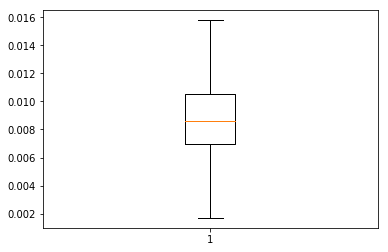

In [22]:
plt.boxplot(dfx['S2p'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f832f912f98>,
 'caps': [<matplotlib.lines.Line2D at 0x7f832f89d668>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f832f912e48>],
 'medians': [<matplotlib.lines.Line2D at 0x7f832f89dcf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f832f8a5080>],
 'means': []}

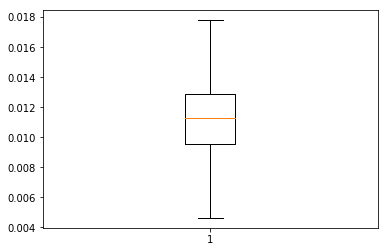

In [23]:
plt.boxplot(dfx['S3p'])

In [24]:
# concat dfx dataframe and dfbinary dataframe to create the full x-variable dataframe 
dfx = pd.concat([dfx, dfbinary], axis=1)
dfx.head()

,C1,C4,C7,C5p,C6p,T4p,T3p,T5p,S1p,S2p,S3p,C2,C3p
0,122.000,0.029074,51.345,3.864345,11.111111,0.640426,0.908876,0.054250,0.004875,0.009199,0.010929,1.0,0
1,254.375,-0.013352,25.936,7.882541,0.000000,0.644753,0.898724,0.051395,0.003258,0.011105,0.010876,0.0,1
2,90.000,0.020715,7.378,3.369134,0.000000,0.636816,0.909350,0.061764,0.009423,0.006271,0.011403,1.0,1
3,209.000,0.020023,8.526,3.299697,0.000000,0.539634,0.917060,0.061630,0.009423,0.007144,0.013319,1.0,1
4,80.000,-0.034895,632.298,3.726269,5.000000,0.587413,0.888469,0.048550,0.004518,0.010047,0.011261,1.0,0


In [25]:
# export the new csv file to use in normalization using min/max scaler 
dfx.to_csv('../csv_files/p3iqr.csv')